# Notebook for make profiling of di-f Correlation experiments

## Experiment name: mxretailsalary1

## Experiment General Data
### Team roles:
* PipeMaster: jag.pascoe
* BizEngineer: 
* DataEngineer:
* MLEngineer:
* SWEngineer:

### Description (Use case):
Predict salary per day estimation to be obtained for working in retail sector in any state of Mexico.
Supposing you are looking for being hired in a Retail Business in any of Mexico's state you want to. You want to predict which would be the base salary per day you might get as attendant of that retail business. This salary not include any commision, tax, or any other concept.

### Type of experiment: Correlation
### Independent Variables (inputs):
1) State of Mexico where you are supposing to get hired (CAT). 
2) How many employees (including yourself) work in that particular business now (NUMBER)
3) How much sales per day in average, you estimate you will provide to that business in pesos (FLOAT)

### Dependent Variables (outputs):
1) Estimated base salary per day (FLOAT)

## Experiment preparation, imports and config.yaml

In [1]:
%load_ext autoreload
%autoreload 2
# The %load_ext autoreload and %autoreload 2 magic commands are used to automatically 
# reload modules when they are changed. This can be useful when you are developing code 
# in an interactive environment, as it allows you to see the changes you make to your modules 
# without having to restart the kernel.
import os
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf
import pandas as pd
import numpy as np
import ydata_profiling as yp
import os

# for global initialization: NOT RECOMMENDED
#initialize(version_base=None, config_path="../src/conf")
#compose(config_name='config')

with initialize(version_base=None, config_path="../src/conf"):
    cfg = compose(config_name='config')
    print(cfg)

/home/jagpascoe/democlient-sklearn/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/jagpascoe/democlient-sklearn/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


{'general_ml': {'seed': 123, 'encoding': 'iso-8859-1', 'cloud': 'AWS'}, 'paths': {'project_dir': '...', 'raw_data': '${hydra:runtime.cwd}/data/raw', 'interim_data': '${hydra:runtime.cwd}/data/interim', 'processed_data': '${hydra:runtime.cwd}/data/processed', 'reports': '${hydra:runtime.cwd}/reports'}, 'cloud_paths': {'bucket_path': 'dif-b-democlient-sklearn', 'experiment_path': '${cloud_paths.bucket_path}/mxretailsalary1', 'mlflow_path': '${cloud_paths.experiment_path}/mlflow', 'reports_path': '${cloud_paths.experiment_path}/reports', 'rawdata_path': '${cloud_paths.experiment_path}/raw-data', 'dvc_path': '${cloud_paths.experiment_path}/dvc-store'}, 'file_names': {'raw_file': 'raw-data.csv', 'data_file': 'datafile.csv', 'train_features': 'train_features.csv', 'train_labels': 'train_labels.csv', 'validation_features': 'valid_features.csv', 'validation_labels': 'valid_labels.csv', 'test_features': 'test_features.csv', 'test_labels': 'test_labels.csv', 'data_profiling_report': 'data_profil

In [2]:
#reading raw-data

raw_file = pd.read_csv(os.path.join('../data/raw', cfg.file_names.raw_file), 
                   #encoding=cfg.general_ml.encoding,
                   )
raw_file.head()

,state,municipio,businesses,employees,payroll,expenditures,income,payroll_employee_day,profits_biz_day,sales_employee_day,employees_unit
0,Ags,Aguascalientes,11402,120923,4997.813674,129044.643300,159695.334000,114.807074,6249.604612,3668.434872,10.6054201
1,Ags,Asientos,231,1647,29.092255,524.807734,621.055144,49.066071,807.5415528,1047.451838,7.12987013
2,Ags,Calvillo,591,4605,99.342787,1743.278407,2246.247441,59.924470,1897.09648,1354.956835,7.791878173
3,Ags,Cosio,104,468,4.577495,101.941048,136.364948,27.169366,797.1796419,809.383597,4.5
4,Ags,El Llano,104,860,14.802274,342.630524,427.291666,47.810963,1865.888567,1380.141041,8.269230769


In [3]:
#cutting dataset for this experiment
data=raw_file[['state',
        'businesses',
        'employees',
        'payroll',
        'income']]
data

,state,businesses,employees,payroll,income
0,Ags,11402,120923,4997.813674,159695.334000
1,Ags,231,1647,29.092255,621.055144
2,Ags,591,4605,99.342787,2246.247441
3,Ags,104,468,4.577495,136.364948
4,Ags,104,860,14.802274,427.291666
...,...,...,...,...,...
2482,Zacatecas,147,785,2.811121,160.114046
2483,Zacatecas,149,875,4.875017,289.174975
2484,Zacatecas,96,604,7.800028,219.851736
2485,Zacatecas,339,2043,34.189010,1282.438977


In [4]:
#Taking a sample of the data, reducing from 2487 records to 750
data = data.sort_values(by='businesses',ascending=False)
data = data.head(750)
data = data.sample(frac=1).reset_index(drop=True)
data.groupby('state').count() #to show data distribution by state


,businesses,employees,payroll,income
state,,,,
Ags,6,6,6,6
BC,6,6,6,6
BCS,5,5,5,5
CDMX,17,17,17,17
Campeche,8,8,8,8
Chiapas,51,51,51,51
Chihuahua,10,10,10,10
Coahuila,15,15,15,15
Colima,7,7,7,7


data.shpe, data2.shape 

## Data preparation and homologation for EDA

In [5]:
#reviewing data types
data.dtypes

state          object
businesses      int64
employees       int64
payroll       float64
income        float64
dtype: object

In [6]:
# Finding number of records with 0, NaN, or empty values
mask=data.apply(lambda x: any([val == 0 or pd.isna(val) or val == '' for val in x]), axis=1)
mask.sum()



0

In [7]:
#finding recosrds with nan 
data.isna().sum()

state         0
businesses    0
employees     0
payroll       0
income        0
dtype: int64

In [8]:
#correcting nan in Payroll by substitute them with the payrrol mean by estado.


# Compute the average by category
payroll_average = data.groupby('state')['payroll'].transform('mean')
employees_average = data.groupby('state')['employees'].transform('mean')


# Replace NaN values with the corresponding category average
payroll2 = data['payroll'].fillna(data['employees']*payroll_average/employees_average)
data['payroll']=payroll2

# Display the modified dataframe
print(data[mask])


Empty DataFrame
Columns: [state, businesses, employees, payroll, income]
Index: []


In [9]:
# check records with zeros
data[data['employees']==0]
data[data['businesses']==0]

,state,businesses,employees,payroll,income


In [10]:
# Replace cero values with other value
data.loc[data['businesses'] == 0, 'businesses'] = 1.0 #in this case the better value to filna is 1 business at least
data.head()


,state,businesses,employees,payroll,income
0,Chiapas,489,2966,52.333932,1647.551419
1,Veracruz,983,6563,327.414184,21304.361430
2,Puebla,383,1554,6.988509,242.100198
3,Nuevo Leon,2135,26469,626.113028,37027.882420
4,Sinaloa,303,2013,28.592356,912.116292


In [11]:
# create new fields 

data['income_employee_day']=data['income']*1000000/data['employees']/360
data['employees_business'] = (data['employees']/data['businesses']+0.5).astype(int)
data['salary_employee_day']=data['payroll']*1000000/data['employees']/360

#droping innecesary fields
data=data.drop(['employees', 'income','businesses','payroll'],axis=1)

# correcting data types and renaming the fields to be more accurate
data['state']=data['state'].astype('category')

data.head()

,state,income_employee_day,employees_business,salary_employee_day
0,Chiapas,1542.997882,6,49.012823
1,Veracruz,9017.032112,7,138.577456
2,Puebla,432.754536,4,12.491973
3,Nuevo Leon,3885.875135,12,65.707161
4,Sinaloa,1258.646978,7,39.455147


## EDA Engineering Data Analisys

### EDA with pandas profiling, and saving report in ./reports

In [12]:
#running the profiler to review data, saving the report on ./reports directory

ProfileReport = yp.ProfileReport(data, title=str(cfg.file_names.data_profiling_report), explorative=True)
ProfileReport.to_file(os.path.join('../reports', cfg.file_names.data_profiling_report), 
                      #encoding=cfg.general_ml.encoding
                     )

ProfileReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### EDA at detail with pandas, matplotlib and seaborn

In [13]:
# To be developed

## ML profiling with Pycaret

In [14]:
#Choose the Ml model to be applied, among: regression, Classifications, time_series, Clustering, NLP
from pycaret.regression import *
from pycaret import version_
version_

'3.0.3'

In [15]:
#to show docstring of setup() function
?setup

Signature:
setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame]]] = None,
    target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    train_size: float = 0.7,
    test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    ordinal_features: Optional[Dict[str, list]] = None,
    numeric_features: Optional[List[str]] = None,
    categorical_features: Optional[List[str]] = None,
    date_features: Optional[List[str]] = None,
    text_features: Optional[List[str]] = None,
    ignore_features: Optional[List[str]] = None,
    keep_features: Optional[List[str]] = None,
    preprocess: 

### Model to find
Setup the model with characteristics needed to get the key model.
The setup() function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function.

In [16]:
model_to_find =   setup(data = data, #see above 
                        #log_experiment = True,
                        #experiment_name = f'{cfg.general_ml.client}-{cfg.general_ml.project}-{cfg.general_ml.experiment}',
                        #target = cfg.data_fields.label, # get the target label from cfg
                        target='salary_employee_day',
                        #train_size=0.6, #default = 0.7
                        session_id=cfg.general_ml.seed, # get the seed from config
                        #train_size = 1.0-float(cfg.data_pipeline.data_transform_params.percent_valid), #get %valid from cfg
                        transformation=True, 
                        #transformation_method='quantile',
                        #fix_imbalance = True, #8:2
                        normalize=True,
                        normalize_method="minmax",
                        #polynomial_features=True,
                        #polynomial_degree = 5,
                        max_encoding_ohe =32, #default=25,
                        #remove_multicollinearity=True,
                        #categorical_features=['state'],
                        #remove_outliers=True,
                        #outliers_threshold=0.075, #default=0.05
                        )

,Description,Value
0,Session id,123
1,Target,salary_employee_day
2,Target type,Regression
3,Original data shape,"(750, 4)"
4,Transformed data shape,"(750, 35)"
5,Transformed train set shape,"(525, 35)"
6,Transformed test set shape,"(225, 35)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


In [17]:
#with this model_to_find, let's see how was transformed the dataset 
get_config('dataset_transformed')

,state_Oaxaca,state_Nayarit,state_Yucatan,state_Veracruz,state_Mexico,state_Puebla,state_Michoacan,state_Queretaro,state_Campeche,state_Tlaxcala,...,state_Tabasco,state_Sonora,state_Morelos,state_BC,state_Durango,state_Chihuahua,state_Ags,income_employee_day,employees_business,salary_employee_day
240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.364011,0.377637,27.423927
100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.456179,0.570460,77.449493
626,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406319,0.635535,51.367805
273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301300,0.487416,36.127544
349,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490346,0.487416,59.650955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270459,0.377637,3.506382
450,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.364716,0.487416,64.154343
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519133,0.731076,73.149254
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.576867,0.867683,99.649284


### Getting the best model 
From all the possibles using compare_models() function.
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [18]:
best_model=compare_models( sort='R2', #from which metric you will choose the best model
                          #include=['list', 'of', 'models'], #list of models to be included, comment if all
                          #n_select= 3, #if you want you can get the Top N models instead of just one model. 
                          cross_validation=True, #If you don't want to evaluate models using cross-validation
                          )

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [19]:
best_model.get_params()



{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 123}

### Selected Model
Selected_model is the best model choosen, you may want to use another kfolds param to get this model.

This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [20]:
models() #to show available models in this library

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [21]:
# And create the selected model in ten kfolds
selected_model = create_model(best_model,
                              #'gbr', 
                              fold=5, #default = None. Controls cross-validation. Integer:'n_splits'
                              cross_validation=True,
                              return_train_score=False, #To see the performance metrics on the training set by fold 
                              )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:16:05
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.0519,233.5444,15.2822,0.7631,0.2941,0.2517
1,10.2844,192.2418,13.8651,0.8515,0.3131,0.2930
2,17.0484,656.5982,25.6242,0.5569,0.3691,0.2998
3,11.3833,240.7697,15.5168,0.7726,0.3659,0.3206
4,11.6918,345.6644,18.5921,0.7584,0.3145,0.2634
Mean,12.2920,333.7637,17.7761,0.7405,0.3314,0.2857
Std,2.4240,169.1650,4.2161,0.0979,0.0304,0.0250


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
print(selected_model, selected_model.get_params())

<catboost.core.CatBoostRegressor object at 0x7f53626b6380> {'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 123}


In [23]:
#train models in a loop
selected_models  = [create_model('huber', alpha = i) for i in [0.01, 0.001, 0.0001, 0.00001]]
#you will see a table for each option:

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:16:33
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Huber Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.2624,218.9620,14.7974,0.7918,0.5336,0.2791
1,10.9740,235.9343,15.3602,0.7399,0.3794,0.2857
2,11.7130,289.6957,17.0204,0.7534,0.4992,0.4354
3,12.2984,311.7645,17.6569,0.7940,0.4882,0.4077
4,16.4596,653.3158,25.5600,0.5517,0.4912,0.3336
5,13.7371,318.5939,17.8492,0.7785,0.3789,0.2793
6,9.9116,164.0045,12.8064,0.8202,0.3862,0.3718
7,12.7734,250.8783,15.8391,0.7750,0.4177,0.3723
8,12.8800,279.1538,16.7079,0.7715,0.4539,0.4535


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.2747,217.3952,14.7443,0.7933,0.4680,0.2817
1,11.0492,236.2322,15.3698,0.7396,0.3680,0.2899
2,12.0306,298.7887,17.2855,0.7457,0.5226,0.4572
3,12.2347,306.1777,17.4979,0.7977,0.4800,0.4124
4,16.3814,648.9745,25.4750,0.5547,0.4926,0.3349
5,13.6615,315.0524,17.7497,0.7810,0.4178,0.2829
6,9.8612,163.0225,12.7680,0.8213,0.3802,0.3718
7,12.6945,249.0187,15.7803,0.7766,0.3982,0.3743
8,12.9895,281.4974,16.7779,0.7696,0.4331,0.4670


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.3454,219.7546,14.8241,0.7911,0.4629,0.2828
1,11.0587,236.2834,15.3715,0.7396,0.3672,0.2904
2,12.0606,299.7048,17.3120,0.7449,0.5275,0.4592
3,12.2280,305.6152,17.4819,0.7981,0.4750,0.4129
4,16.3744,648.6183,25.4680,0.5549,0.4928,0.3350
5,13.6547,314.7263,17.7405,0.7812,0.4222,0.2833
6,9.8568,162.9550,12.7654,0.8214,0.3798,0.3719
7,12.6864,248.8578,15.7752,0.7768,0.3968,0.3745
8,13.0011,281.7726,16.7861,0.7693,0.4313,0.4685


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.3459,219.7581,14.8242,0.7911,0.4625,0.2828
1,11.0597,236.2980,15.3720,0.7395,0.3672,0.2904
2,12.0640,299.8050,17.3149,0.7448,0.5281,0.4594
3,12.2276,305.5557,17.4802,0.7981,0.4746,0.4130
4,16.3734,648.5742,25.4671,0.5549,0.4927,0.3350
5,13.6537,314.6919,17.7396,0.7812,0.4227,0.2833
6,9.8565,162.9519,12.7653,0.8214,0.3797,0.3719
7,12.6846,248.8119,15.7738,0.7768,0.3966,0.3745
8,13.0020,281.7928,16.7867,0.7693,0.4312,0.4686


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
# You can also write your own class with fit and predict function. 
# PyCaret will be compatible with that. Here is a simple example

"""
# load dataset 
from pycaret.datasets #import get_data 
insurance= get_data('insurance') 

# init setup
from pycaret.regression import * 
reg1 = setup(data = insurance, target = 'charges')

# create custom estimator
import numpy as np
from sklearn.base import BaseEstimator
class MyOwnModel(BaseEstimator):
    
    def __init__(self):
        self.mean = 0
        
    def fit(self, X, y):
        self.mean = y.mean()
        return self
    
    def predict(self, X):
        return np.array(X.shape[0]*[self.mean])
        
# create an instance
my_own_model = MyOwnModel()

# train model
my_model_trained = create_model(my_own_model)
"""

"\n# load dataset \nfrom pycaret.datasets #import get_data \ninsurance= get_data('insurance') \n\n# init setup\nfrom pycaret.regression import * \nreg1 = setup(data = insurance, target = 'charges')\n\n# create custom estimator\nimport numpy as np\nfrom sklearn.base import BaseEstimator\nclass MyOwnModel(BaseEstimator):\n    \n    def __init__(self):\n        self.mean = 0\n        \n    def fit(self, X, y):\n        self.mean = y.mean()\n        return self\n    \n    def predict(self, X):\n        return np.array(X.shape[0]*[self.mean])\n        \n# create an instance\nmy_own_model = MyOwnModel()\n\n# train model\nmy_model_trained = create_model(my_own_model)\n"

### Tunned Model
This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

The tuning grid for hyperparameters is already defined by PyCaret for all the models in the library. However, if you wish you can define your own search space by passing a custom grid using custom_grid parameter. 


In [25]:
# Now lets find the best hyperparameters for the selected model 

tuned_model = tune_model(selected_model, 
                         optimize = 'r2', #which metric to optimize
                         n_iter=10,
                         
                         choose_better=True, #will always return a better performing model meaning that if 
                                             #hyperparameter tuning doesn't improve the performance, 
                                             #it will return the input model.
                         
                         #custom_grid={ #comment if need full search:
                          #               'alpha': [0.01, 0.001, 0.0001], 
                           #              'epsilon': [.95, 1.05, 1.25, 1.35],
                            #          }
                        )

#NOTE: choose_better doesn't affect the scoring grid that is displayed on the screen. 
#The scoring grid will always present the performance of the best model as selected by the tuner, 
#regardless of the fact that output performance < input performance.



,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:18:20
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.9294,168.2168,12.9698,0.8401,0.2510,0.2115
1,10.7470,240.3227,15.5023,0.7351,0.3044,0.2542
2,9.7174,200.0589,14.1442,0.8297,0.2901,0.2514
3,12.1740,295.9342,17.2027,0.8045,0.3788,0.3754
4,17.8089,727.4751,26.9717,0.5008,0.3877,0.3179
5,13.7416,343.5832,18.5360,0.7612,0.2829,0.2331
6,10.1843,174.1008,13.1947,0.8092,0.3907,0.3561
7,13.3163,313.3077,17.7005,0.7190,0.3571,0.3108
8,12.4848,357.8090,18.9158,0.7071,0.3273,0.2730


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
#PyCaret integrates seamlessly with many different libraries for hyperparameter tuning. 
#This gives you access to many different types of search algorithms including random, bayesian, optuna, TPE, 
#and a few others. All of this just by changing a parameter. By default, PyCaret using RandomGridSearch 
#from the sklearn and you can change that by using search_library and search_algorithm parameter in
#the tune_model function
"""
# load dataset
from pycaret.datasets import get_data 
boston = get_data('boston') 

# init setup
from pycaret.regression import * 
reg1 = setup(boston, target = 'medv')

# train model
dt = create_model('dt')

# tune model sklearn
tune_model(dt)

# tune model optuna
tune_model(dt, search_library = 'optuna')

# tune model scikit-optimize
tune_model(dt, search_library = 'scikit-optimize')

# tune model tune-sklearn
tune_model(dt, search_library = 'tune-sklearn', search_algorithm = 'hyperopt')
"""

"\n# load dataset\nfrom pycaret.datasets import get_data \nboston = get_data('boston') \n\n# init setup\nfrom pycaret.regression import * \nreg1 = setup(boston, target = 'medv')\n\n# train model\ndt = create_model('dt')\n\n# tune model sklearn\ntune_model(dt)\n\n# tune model optuna\ntune_model(dt, search_library = 'optuna')\n\n# tune model scikit-optimize\ntune_model(dt, search_library = 'scikit-optimize')\n\n# tune model tune-sklearn\ntune_model(dt, search_library = 'tune-sklearn', search_algorithm = 'hyperopt')\n"

### Essemble models
This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.+

![image.png](attachment:image.png)




** Bagging: 
Also known as Bootstrap aggregating, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

In [27]:
bagging_model = ensemble_model(tuned_model, 
                               n_estimators=100, #By default, PyCaret uses 10 estimators
                               choose_better=True, #When set to True it will always return a better performing model 
                                                   #meaning that if hyperparameter tuning doesn't improve the performance, 
                                                   #it will return the input model
                               method = 'Bagging')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:23:10
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Bagging Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.2964,178.4101,13.3570,0.8304,0.2523,0.2226
1,10.8641,257.2768,16.0398,0.7164,0.3082,0.2603
2,10.0270,197.4148,14.0504,0.8320,0.2488,0.2205
3,11.5893,272.4531,16.5062,0.8200,0.3701,0.3606
4,16.6284,734.9456,27.1099,0.4957,0.3788,0.2985
5,13.8094,387.9822,19.6973,0.7303,0.3039,0.2417
6,9.7329,167.6713,12.9488,0.8162,0.3919,0.3508
7,12.5162,270.7962,16.4559,0.7571,0.3431,0.2996
8,12.1279,336.6079,18.3469,0.7244,0.3409,0.2872


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


In [28]:
print(bagging_model)



** Boosting: 
Is an ensemble meta-algorithm for primarily reducing bias and variance in supervised learning. Boosting is in the family of machine learning algorithms that convert weak learners to strong ones. A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification.

In [29]:
boosted_model = ensemble_model(tuned_model, 
                               n_estimators=100, #By default, PyCaret uses 10 estimators
                               choose_better=True, #When set to True it will always return a better performing model 
                                                   #meaning that if hyperparameter tuning doesn't improve the performance, 
                                                   #it will return the input model
                               method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.4203,234.7814,15.3226,0.7768,0.2959,0.2736
1,12.4758,323.1087,17.9752,0.6439,0.3432,0.3067
2,11.6130,238.5894,15.4463,0.7969,0.2676,0.2478
3,12.1518,306.1715,17.4978,0.7977,0.4090,0.4105
4,17.6438,781.7755,27.9602,0.4635,0.3924,0.3235
5,14.5447,420.1928,20.4986,0.7079,0.3227,0.2674
6,10.7499,205.8303,14.3468,0.7744,0.4160,0.3766
7,13.3593,304.4274,17.4478,0.7269,0.3551,0.3294
8,13.4453,373.5897,19.3285,0.6942,0.3562,0.3119


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


In [30]:
print(boosted_model)

### Blend model
This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function

In [31]:
top_best_models = ['huber','br','lr','gbr']
top_models=[]
for i,model in enumerate(top_best_models):
    print(f'{i+1} of {len(top_best_models)}: model: {model}')
    top_models.append(create_model(model))

print(f'Blend for {i+1} Models:')
blend_model = blend_models(top_models,
                          fold = 5, #evaluation is done using fold cross-validation.
                          weights=[0.25, 0.25, 0.40, 0.1], #weights to be given to each input model.
                          )

print(blend_model)

1 of 4: model: huber


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2 of 4: model: br


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.3597,211.0473,14.5275,0.7993,0.5387,0.2901
1,11.1809,255.7537,15.9923,0.7181,0.3675,0.2934
2,11.7885,288.5684,16.9873,0.7544,0.4775,0.4409
3,12.2972,310.5231,17.6217,0.7948,0.4936,0.4413
4,16.2472,640.9044,25.3161,0.5602,0.5532,0.3461
5,13.3827,300.4649,17.3339,0.7911,0.3981,0.2826
6,9.9500,163.0728,12.7700,0.8212,0.3908,0.3877
7,13.0299,260.2448,16.1321,0.7666,0.3794,0.3749
8,13.3097,298.6847,17.2825,0.7555,0.4327,0.4858


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

3 of 4: model: lr


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.3367,209.1215,14.4610,0.8012,0.4496,0.2916
1,11.3578,256.0391,16.0012,0.7178,0.3550,0.2999
2,12.1693,300.5679,17.3369,0.7442,0.5289,0.4708
3,12.2622,303.2932,17.4153,0.7996,0.4545,0.4510
4,16.1637,639.3530,25.2854,0.5613,0.5570,0.3480
5,13.3628,298.3289,17.2722,0.7926,0.5016,0.2902
6,9.8739,162.7120,12.7559,0.8216,0.3863,0.3881
7,12.9354,259.4175,16.1064,0.7673,0.3683,0.3803
8,13.4570,302.8714,17.4032,0.7521,0.4204,0.5052


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

4 of 4: model: gbr


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.6347,161.3292,12.7015,0.8466,0.2520,0.2095
1,12.0437,322.1514,17.9486,0.6449,0.3288,0.2925
2,9.6390,208.5182,14.4402,0.8225,0.2525,0.2151
3,12.4457,326.3820,18.0660,0.7843,0.3942,0.3914
4,17.7103,748.9063,27.3662,0.4861,0.3939,0.3198
5,13.4676,316.0322,17.7773,0.7803,0.2994,0.2472
6,10.8530,205.1971,14.3247,0.7751,0.4082,0.3779
7,13.5846,303.9770,17.4349,0.7274,0.3615,0.3301
8,12.7644,361.4717,19.0124,0.7041,0.3290,0.2878


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Blend for 4 Models:


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.9938,224.1703,14.9723,0.7726,0.4840,0.2819
1,11.1229,257.5316,16.0478,0.8010,0.4438,0.3934
2,14.9023,495.3622,22.2567,0.6657,0.4356,0.3029
3,11.5531,214.1809,14.6349,0.7977,0.4352,0.3559
4,12.6499,347.0429,18.6291,0.7574,0.3905,0.4056
Mean,12.2444,307.6576,17.3082,0.7589,0.4378,0.3479
Std,1.4511,104.8855,2.8434,0.0493,0.0297,0.0487


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Huber Regressor', HuberRegressor()),
                            ('Bayesian Ridge', BayesianRidge()),
                            ('Linear Regression', LinearRegression(n_jobs=-1)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123))],
                n_jobs=-1, weights=[0.25, 0.25, 0.4, 0.1])


In [32]:
# or a shorcut using compare_models() function
blend_model_shortcut = blend_models(compare_models(n_select=4),
                                   weights=[0.25, 0.25, 0.40, 0.1], #weights to be given to each input model.
                                   )

print(blend_model_shortcut)

Processing:   0%|          | 0/88 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.5946,188.8402,13.7419,0.8205,0.3737,0.2572
1,10.3388,206.9875,14.3871,0.7719,0.4583,0.2719
2,10.6262,243.0179,15.5890,0.7932,0.3764,0.3528
3,11.4537,281.0663,16.7650,0.8143,0.4239,0.3672
4,16.2150,653.8942,25.5714,0.5513,0.4139,0.3136
5,12.7862,289.0599,17.0018,0.7991,0.3136,0.2533
6,9.2516,143.5097,11.9796,0.8427,0.4364,0.3571
7,12.3022,239.9777,15.4912,0.7848,0.4184,0.3403
8,12.3460,270.2428,16.4391,0.7788,0.6256,0.3803


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7f536387ec50>),
                            ('Huber Regressor', HuberRegressor()),
                            ('Passive Aggressive Regressor',
                             PassiveAggressiveRegressor(random_state=123)),
                            ('Bayesian Ridge', BayesianRidge())],
                n_jobs=-1, weights=[0.25, 0.25, 0.4, 0.1])


### Stack model
This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [33]:
top_best_models = ['huber','br','lr','gbr']
top_models=[]
for i,model in enumerate(top_best_models):
    print(f'{i+1} of {len(top_best_models)}: model: {model}')
    top_models.append(create_model(model))

print(f'Stack for {i+1} Models:')
stack_model = stack_models(top_models,
                          fold = 5, #evaluation is done using fold cross-validation.
                          )

print(stack_model)

1 of 4: model: huber


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:08:01
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Huber Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.3454,219.7546,14.8241,0.7911,0.4629,0.2828
1,11.0587,236.2834,15.3715,0.7396,0.3672,0.2904
2,12.0606,299.7048,17.3120,0.7449,0.5275,0.4592
3,12.2280,305.6152,17.4819,0.7981,0.4750,0.4129
4,16.3744,648.6183,25.4680,0.5549,0.4928,0.3350
5,13.6547,314.7263,17.7405,0.7812,0.4222,0.2833
6,9.8568,162.9550,12.7654,0.8214,0.3798,0.3719
7,12.6864,248.8578,15.7752,0.7768,0.3968,0.3745
8,13.0011,281.7726,16.7861,0.7693,0.4313,0.4685


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2 of 4: model: br


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.3597,211.0473,14.5275,0.7993,0.5387,0.2901
1,11.1809,255.7537,15.9923,0.7181,0.3675,0.2934
2,11.7885,288.5684,16.9873,0.7544,0.4775,0.4409
3,12.2972,310.5231,17.6217,0.7948,0.4936,0.4413
4,16.2472,640.9044,25.3161,0.5602,0.5532,0.3461
5,13.3827,300.4649,17.3339,0.7911,0.3981,0.2826
6,9.9500,163.0728,12.7700,0.8212,0.3908,0.3877
7,13.0299,260.2448,16.1321,0.7666,0.3794,0.3749
8,13.3097,298.6847,17.2825,0.7555,0.4327,0.4858


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

3 of 4: model: lr


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.3367,209.1215,14.4610,0.8012,0.4496,0.2916
1,11.3578,256.0391,16.0012,0.7178,0.3550,0.2999
2,12.1693,300.5679,17.3369,0.7442,0.5289,0.4708
3,12.2622,303.2932,17.4153,0.7996,0.4545,0.4510
4,16.1637,639.3530,25.2854,0.5613,0.5570,0.3480
5,13.3628,298.3289,17.2722,0.7926,0.5016,0.2902
6,9.8739,162.7120,12.7559,0.8216,0.3863,0.3881
7,12.9354,259.4175,16.1064,0.7673,0.3683,0.3803
8,13.4570,302.8714,17.4032,0.7521,0.4204,0.5052


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

4 of 4: model: gbr


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.6347,161.3292,12.7015,0.8466,0.2520,0.2095
1,12.0437,322.1514,17.9486,0.6449,0.3288,0.2925
2,9.6390,208.5182,14.4402,0.8225,0.2525,0.2151
3,12.4457,326.3820,18.0660,0.7843,0.3942,0.3914
4,17.7103,748.9063,27.3662,0.4861,0.3939,0.3198
5,13.4676,316.0322,17.7773,0.7803,0.2994,0.2472
6,10.8530,205.1971,14.3247,0.7751,0.4082,0.3779
7,13.5846,303.9770,17.4349,0.7274,0.3615,0.3301
8,12.7644,361.4717,19.0124,0.7041,0.3290,0.2878


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Stack for 4 Models:


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.8748,222.1155,14.9035,0.7747,0.4730,0.2784
1,20.6829,820.1879,28.6389,0.3663,0.6088,0.6023
2,31.7090,1695.2138,41.1730,-0.1440,0.8589,0.6917
3,19.8566,665.2709,25.7928,0.3717,0.6055,0.5592
4,12.0014,330.2875,18.1738,0.7692,0.4059,0.3306
Mean,19.0249,746.6151,25.7364,0.4276,0.5904,0.4924
Std,7.4844,521.5933,9.1789,0.3379,0.1553,0.1602


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Huber Regressor', HuberRegressor()),
                              ('Bayesian Ridge', BayesianRidge()),
                              ('Linear Regression',
                               LinearRegression(n_jobs=-1)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)


In [34]:
# or a shorcut using compare_models() function
stack_model_shortcut =stack_models(compare_models(n_select=4)
                                   )

print(blend_model_shortcut)

Processing:   0%|          | 0/88 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.7775,184.9615,13.6001,0.8242,0.3945,0.2597
1,10.7376,220.0839,14.8352,0.7574,0.4733,0.2816
2,10.7115,243.1060,15.5919,0.7931,0.4377,0.3708
3,11.6486,286.3228,16.9211,0.8108,0.4420,0.3807
4,16.1727,658.4321,25.6599,0.5482,0.4171,0.3139
5,13.2134,313.0340,17.6928,0.7824,0.3640,0.2518
6,9.3510,150.6969,12.2759,0.8348,0.4417,0.3660
7,11.1934,199.7593,14.1336,0.8208,0.3815,0.2904
8,12.7768,275.8934,16.6100,0.7741,0.6103,0.4027


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7f536387ec50>),
                            ('Huber Regressor', HuberRegressor()),
                            ('Passive Aggressive Regressor',
                             PassiveAggressiveRegressor(random_state=123)),
                            ('Bayesian Ridge', BayesianRidge())],
                n_jobs=-1, weights=[0.25, 0.25, 0.4, 0.1])


### Model Evaluation


** Plot the model (simple function)
This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases

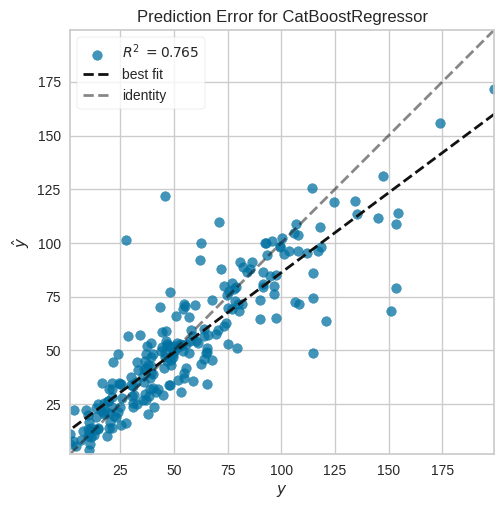

In [35]:
plot_model(tuned_model, 
           plot='error',
           #save=True,
          )

In [36]:
#https://pycaret.gitbook.io/docs/get-started/functions/analyze#plot_model
    

** Evaluate Model with evaluate_model()

The evaluate_model() displays a user interface for analyzing the performance of a trained model. 
It calls the plot_model().


In [37]:
# evaluate the model

evaluate_model(tuned_model)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [38]:
# Only for classification
#interpret_model(tuned_model)

### interpret model

** interpret_model
This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). 

In [39]:
#interpret_model(tuned_model) # this functions is only for trees

** dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using ExplainerDashboard 

In [40]:
dashboard(tuned_model)

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://127.0.0.1:8050


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


AttributeError: 'tuple' object has no attribute 'tb_frame'

### deep check
this function runs a full suite check over a trained model using the deepcheck library

In [ ]:
deep_check(tuned_model)

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_J24YLYAOPMAC5O075BPW4FKA4">Full Suite</h1>\n<…

### eda - somed day will work!

In [ ]:
#eda(display_format = 'bokeh')

### Predict
This function generates the label using a trained model.  When data is None, it predicts label and score on the holdout set. 

In [ ]:
predict_model(tuned_model)

,state,income_employee_day,employees_business,salary_employee_day,prediction_label
138,Morelos,2394.821045,7,57.740555,70.351555
511,Puebla,926.492065,4,31.114279,26.470633
427,Mexico,2002.122681,6,40.131763,53.993416
161,Tamaulipas,4051.437256,10,114.703262,109.733382
307,Jalisco,2497.742676,8,73.142143,73.300286
...,...,...,...,...,...
594,Puebla,303.548492,4,3.036171,-4.388350
450,Sonora,3142.165283,12,90.229645,94.895918
155,Guerrero,1155.231812,5,31.643803,31.081860
75,Veracruz,1483.014648,6,55.480553,70.767574


In [ ]:
# Finally trains a the model on the entire dataset including the hold-out set.

final_model = finalize_model(tuned_model)
final_model




In [ ]:
get_config('X_transformed')

,state_Puebla,state_Sinaloa,state_Mexico,state_Yucatan,state_Michoacan,state_Veracruz,state_Tabasco,state_Nayarit,state_Chiapas,state_Hidalgo,...,state_Morelos,state_Ags,state_Sonora,state_Tamaulipas,state_Chihuahua,state_SLP,state_BC,state_Campeche,income_employee_day,employees_business
240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221783,0.233171
100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505559,0.699754
626,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571439,0.742193
273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.708786,0.647890
349,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462755,0.499741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.422772,0.499741
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.680343,0.874852
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420371,0.583070
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.586277,0.777563


In [ ]:
# save the model

#save_model(final_model, os.path.join(cfg.paths.models, cfg.file_names.ml_profiling_model))
